<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-обзор-данных" data-toc-modified-id="Общий-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Добавление-и-изменение-данных" data-toc-modified-id="Добавление-и-изменение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавление и изменение данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составление-портретов-пользователей-по-регионам" data-toc-modified-id="Составление-портретов-пользователей-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портретов пользователей по регионам</a></span><ul class="toc-item"><li><span><a href="#Североамериканский-регион" data-toc-modified-id="Североамериканский-регион-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Североамериканский регион</a></span></li><li><span><a href="#Европейский-регион" data-toc-modified-id="Европейский-регион-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Европейский регион</a></span></li><li><span><a href="#Японский-регион" data-toc-modified-id="Японский-регион-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Японский регион</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о видеоиграх
Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**
определить влияние различных факторов, таких как оценка критиков, жанр и т.д., на успешность видеоигр, в первую очередь определяемую количеством продаж

**Описание данных:**
для работы мы будем использовать клиентскую базу данных банка-заказчика, в которую входят следующие данные:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**
выполнять работу мы будем в следующей последовательности:
1. Сделаем общий обзор данных
2. Проведем предобработку данных: по возможности заполним пропуски, устраним дубликаты и добавим столбцы
3. Проведем исследовательский анализ данных: изучим самые прибыльные платформы, жанры и посмотрим, есть ли зависимость продаж от оценок игроков и критиков
4. Составим портреты пользователей по регионам: Северной Америки, Европы и Японии
5. Проверим несколько гипотез о равенстве пользовательских оценок между платформами и жанрами
6. Напишем общий вывод

## Общий обзор данных

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


___
Видно, что в данных много пропусков в столбцах с рейтингами, и при этом малое количество пропусков во всех остальных столбцах, что радует.\
При этом названия столбцов не очень удобные, поэтому сразу исправим это, а затем построим гистограммы по каждому столбцу
___

In [4]:
df.columns = df.columns.str.lower()

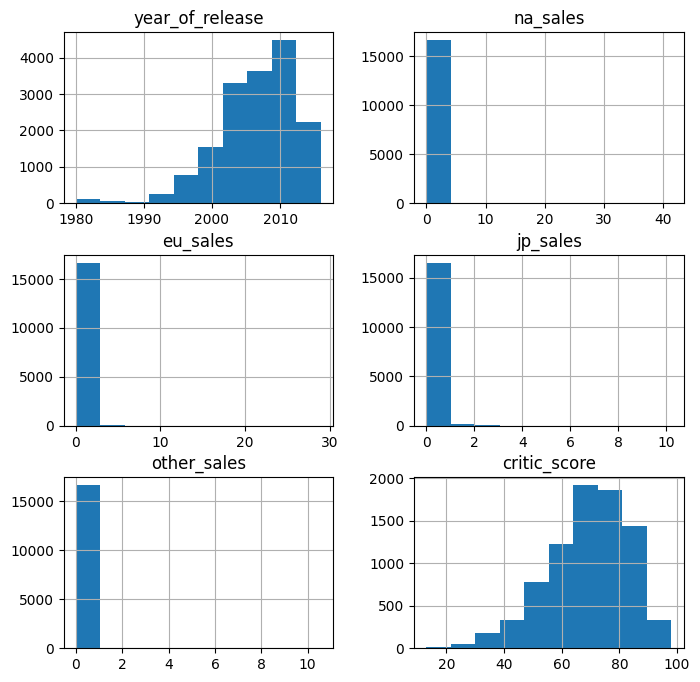

In [5]:
df.hist(figsize=(8,8));

___
В целом данные выглядят достаточно неплохо.\
Изучим каждый столбец немного подробнее
___

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


___
Видно, что в столбцах с продажами присутствует очень небольшое количество выдающихся значений.
___

**Выводы:**
- Исходные данные имеют пропуски
- В данных присутствуют выдающиеся значения

Далее мы займемся предобработкой данных и постараемся исправить неточности, поправим пропуски и возможные дубликаты и приведем данные в рабочее состояние.

## Предобработка данных

### Обработка пропусков

___
Посмотрим на пропуски в колонках
___

In [7]:
df.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

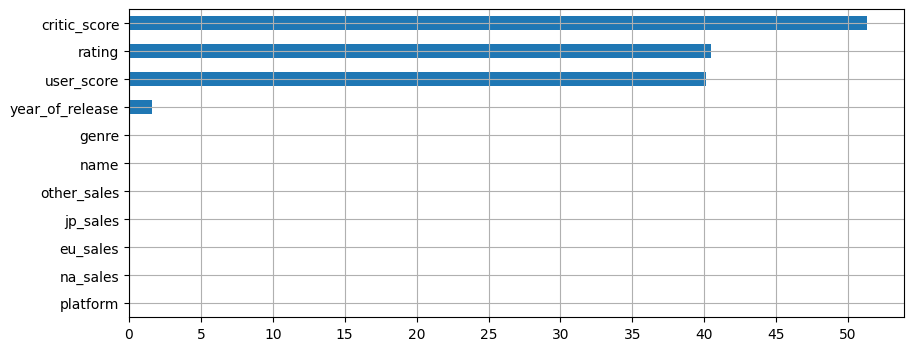

In [8]:
((df.isna().mean()*100)
 .to_frame()
 .sort_values(by=0, \
              ascending=True)
 .plot(kind='barh', \
       grid=True, \
       figsize=(10,4), \
       legend=False, \
       xticks=(np.arange(0,55,5))));

___
Видим, что в столбцах с рейтингом игроков и рейтингом ESRB около 40% пропусков, в столбце с оценкой критиков более половины пропусков

Возможно, часть пропусков в колонках с оценками критиков и игроков связана с одним из нескольких факторов:
- непопулярность игры
- "древность" игры, т.к. в 80-е и 90-е годы еще не было распространенной практики оценки видеоигрового контента (отчасти ввиду молодости)
- потеря данных по техническим причинам (при загрузке/выгрузке)

Что касается данных о рейтинге ESRB, то вероятно, причины могут быть схожими (компания основана в 1994 году), плюс к ним дополнительно добавляется еще одна существенная, и а именно - *это североамериканкая организация*, а значит, игры вышедшие в других регионах они вряд ли оценивали, не считая каких-то крупных, пользующихся популярностью в Америке.\
В Европе и Японии существуют отдельные организации для оценки возрастного рейтинга с несколько другими правилами - PEGI и CERO соответсвенно. Их данных в датасете нет
___
Посмотрим на пропуски в колонке с названием игры
___

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


___
Строки с пропусками в этом столбце не имеют каких-то выдающихся продаж, поэтому с чистой душой удаляем их
___

In [10]:
df = df.drop(df[df['name'].isna()].index)

___
Пропуски в столбце с годом мы оставим нетронутыми. Их немного, и они не помешают нашему расчету.\
В остальных столбцах большое количество пропусков, и мы заполним их средними или медианными значениями. Расчет этих значений мы будем делать по предварительной группировке данных. Группировку будем производить одновременно по жанру и платформе, чтобы уменьшить "размазывание" значений по датасету.
___

In [11]:
genre_platform_critic = df.groupby(['genre', 'platform']).agg({'critic_score':['mean', 'median']})
genre_platform_critic.columns=['mean', 'median']
genre_platform_critic = genre_platform_critic.reset_index()
genre_platform_critic.head()

,genre,platform,mean,median
0,Action,2600,NaN,NaN
1,Action,3DS,63.118644,63.0
2,Action,DC,NaN,NaN
3,Action,DS,58.309353,58.0
4,Action,GB,NaN,NaN


___
Далее мы проверим корреляцию между средним значением оценки критиков и медианным, чтобы определить, какое нам лучше использовать для заполнения пропусков
___

In [12]:
genre_platform_critic['mean'].corr(genre_platform_critic['median'])

0.9494207685174031

___
Можем использовать среднее значение, т.к. судя по коэффициенту корреляции сильного разброса не наблюдается

Перед заполнением проверим, какие характеристики у нашей выборки, чтобы оценить, насколько сильно они изменятся после заполнения пропусков.
___

In [13]:
print('дисперсия выборки до заполнения:', "{:.3f}".format(np.var(df['critic_score'])), end='\n\n')
print('остальные параметры выборки до заполнения:\n', df['critic_score'].describe())

дисперсия выборки до заполнения: 194.249

остальные параметры выборки до заполнения:
 count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


___
Теперь заполним пропуски и посмотрим на изменившиеся значения характеристик выборки
___

In [14]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(by=['genre','platform'])['critic_score'].transform('mean'))

In [15]:
print('дисперсия выборки после заполнения:', "{:.3f}".format(np.var(df['critic_score'])), end='\n\n')
print('остальные параметры выборки после заполнения:\n', df['critic_score'].describe())

дисперсия выборки после заполнения: 115.560

остальные параметры выборки после заполнения:
 count    15581.000000
mean        68.244875
std         10.750225
min         13.000000
25%         63.000000
50%         68.020833
75%         74.000000
max         98.000000
Name: critic_score, dtype: float64


___
Все характеристики, кроме дисперсии, изменились несущественно, поэтому считаем заполнение пропусков успешным.\
Нам удалось заполнить почти 7500 пропусков, а это почти половина таблицы. Это поможет нам в оценке прибыльности игр и платформ\
Оставшиеся пропуски мы оставим, т.к. мы не можем от чего-либо отталкиваться при их заполнении. Либо же, принимая во внимание гипотезу о природе пропусков в этой колонке, мы можем предположить, что часть пропусков осталась в играх на старых и/или непопулярных платформах, следовательно мы никак не можем их адекватно заполнить
___
___
Посмотрим на оценки пользователей
___

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

___
В столбце с оценкой пользователей видим одно интересно значение: **tbd**

После похода на сайт Metacritic (один из крупнейших сервисов с оценками развлекательного контента) узнаем, что эта аббревиатура означает *to be determined* - подлежит определению. Такую плашку игра получает в случае, если отзывов и оценок еще недостаточно для качественного определения ее общей оценки.

Следовательно, игры с данной "оценкой" можно считать играми без оценки. Заменим все такие значения на пустые
___

In [17]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

___
Посмотрим на коэффициент корреляции между оценками критиков и игроков, возможно между ними присутствует какая-то зависимость
___

In [18]:
df['user_score'] = df['user_score'].astype('float')
df['user_score'].corr(df['critic_score'])

0.5434941997720741

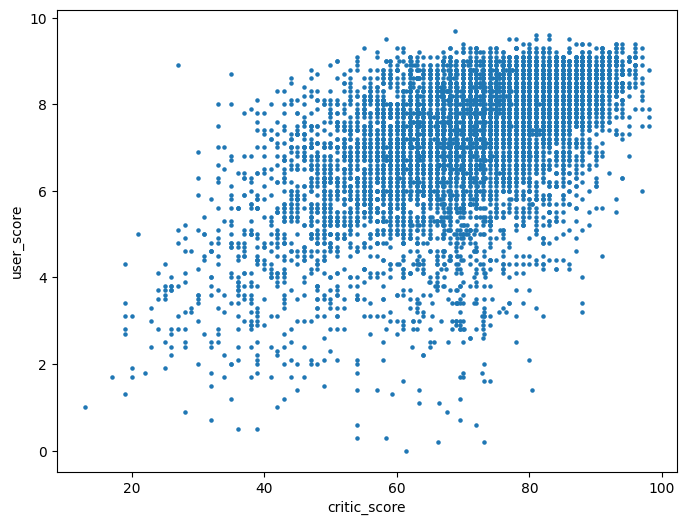

In [19]:
df.plot(x='critic_score', y='user_score', kind='scatter', figsize=(8,6), s=5);

___
Небольшая зависимость присутствует, но разброс точек слишком большой, чтобы эту зависимость можно было бы принять во внимание
___
___
Поступим с пропусками в этом столбце таким же образом, как и в случае с оценкой критиков и еще раз проверим, сильно ли изменились характеристики выборки
___

In [20]:
genre_platform_user = df.groupby(['genre', 'platform']).agg({'user_score':['mean', 'median']})
genre_platform_user.columns=['mean', 'median']
genre_platform_user = genre_platform_user.reset_index()
genre_platform_user.head()

,genre,platform,mean,median
0,Action,2600,NaN,NaN
1,Action,3DS,6.554688,6.65
2,Action,DC,NaN,NaN
3,Action,DS,6.517778,6.90
4,Action,GB,NaN,NaN


In [21]:
genre_platform_user['mean'].corr(genre_platform_user['median'])

0.9446350400138105

In [22]:
print('дисперсия выборки до заполнения:', "{:.3f}".format(np.var(df['user_score'])), end='\n\n')
print('остальные параметры выборки до заполнения:\n', df['user_score'].describe())

дисперсия выборки до заполнения: 2.250

остальные параметры выборки до заполнения:
 count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


In [23]:
df['user_score'] = df['user_score'].fillna(df.groupby(by=['genre','platform'])['user_score'].transform('mean'))

In [24]:
print('дисперсия выборки после заполнения:', "{:.3f}".format(np.var(df['user_score'])), end='\n\n')
print('остальные параметры выборки после заполнения:\n', df['user_score'].describe())

дисперсия выборки после заполнения: 1.265

остальные параметры выборки после заполнения:
 count    15588.000000
mean         7.154146
std          1.124543
min          0.000000
25%          6.708511
50%          7.258442
75%          7.814286
max          9.700000
Name: user_score, dtype: float64


In [25]:
df['user_score'].corr(df['critic_score'])

0.5069649187645043

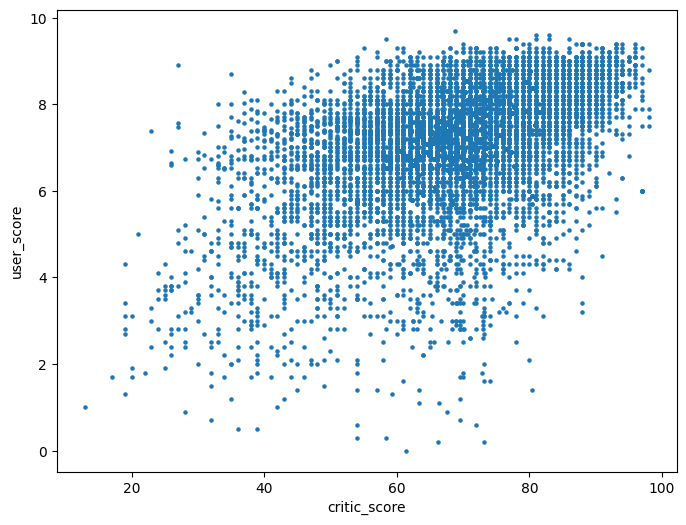

In [26]:
df.plot(x='critic_score', y='user_score', kind='scatter', figsize=(8,6), s=5);

___
Результат неплохой, характеристики выборки изменились не слишком ощутимо. Оставляем заполненные значения.\
Мы заполнили около 8000 пропусков, а пропущенные значения мы оставим пропущенными, по тем же причинам, которые мы описали выше (после заполнения оценок критиков)
___
___
Далее нам необходимо заполнить пропуске в столбце с рейтингом ESRB. Чаще всего этот рейтинг ощутимо зависит от жанра игры, т.к. у каждого жанра есть свои определенные правила и характерные особенности, которые повторяются из игры в игру.\
Однако, принимая во внимание, что во-первых, организация североамериканская, а во-вторых, рейтинги конкретных жанров могут "плавать" от года к году, меняясь в соответствии с актуальными трендами, мы оставим все пропуски в этой колонке
___


### Устранение дубликатов

___
Теперь проверим таблицу на явные дубликаты
___

In [27]:
df.duplicated().sum()

0

In [28]:
df[df['name'].duplicated(keep=False)].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.000000,9.000000,M
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.000000,8.700000,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.000000,3.400000,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,75.171429,6.697143,NaN


In [29]:
df[df[['name', 'platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


___
Видим, что в датасете есть игры, записанные множество раз, каждый раз для разной платформы. Отсеяв их, остаются всего 3 варианта. Проверим их, каждый по отдельности
___

In [30]:
df.query('name=="Need for Speed: Most Wanted"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.000000,9.100000,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.000000,8.500000,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.000000,8.800000,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.000000,9.100000,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.000000,8.500000,T
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.000000,6.100000,E
6473,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,67.547619,8.300000,E
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,71.865672,6.471642,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.000000,8.500000,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,65.800000,6.085714,NaN


In [31]:
df.query('name=="Sonic the Hedgehog"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [32]:
df.query('name=="Madden NFL 13"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.000000,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.000000,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,63.410526,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.000000,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.000000,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.000000,5.5,E


___
Итак, в случае с Need for Speed мы оставим все как есть, т.к. все в порядке\
В случае с Соником и американским футболом устаним неявные дубликаты
___

In [33]:
sonic_sales = df.loc[(df['name'] == 'Sonic the Hedgehog') & \
                     (df['platform'] == 'PS3'), 'eu_sales'].values[1]

nfl_sales = df.loc[(df['name'] == 'Madden NFL 13') & \
                   (df['platform'] == 'PS3'), 'eu_sales'].values[1]

df = df.drop(df.loc[(df.index == 4127) | (df.index == 16230)].index)


In [34]:
df[4124:4129]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4125,World of Outlaws: Sprint Cars 2002,PS2,2002.0,Racing,0.23,0.18,0.00,0.06,80.000000,9.100000,E
4126,Children of Mana,DS,2006.0,Role-Playing,0.16,0.01,0.29,0.01,65.000000,6.000000,E10+
4128,Fantavision,PS2,2000.0,Puzzle,0.14,0.11,0.19,0.04,72.000000,6.300000,E
4129,Double Dragon,2600,1989.0,Action,0.45,0.02,0.00,0.01,NaN,NaN,NaN
4130,Alien Trilogy,PS,1996.0,Shooter,0.24,0.16,0.04,0.03,68.857143,7.861538,NaN


In [35]:
df[16228:16233]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16232,Festa!! Hyper Girls Party,PS2,2006.0,Adventure,0.00,0.00,0.01,0.0,62.348837,7.174419,NaN
16233,Geten no Hana: Yume Akari,PSP,2014.0,Misc,0.00,0.00,0.01,0.0,66.034483,6.845833,NaN
16234,Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore,DS,2008.0,Misc,0.00,0.00,0.01,0.0,63.322581,6.741860,NaN
16235,Vanark,PS,1999.0,Shooter,0.01,0.01,0.00,0.0,68.857143,7.861538,NaN
16236,Game Book DS: Sword World 2.0,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.0,69.154639,7.614607,NaN


In [36]:
df.loc[(df['name'] == 'Sonic the Hedgehog') & \
       (df['platform'] == 'PS3'), 'eu_sales'] += sonic_sales

df.loc[(df['name'] == 'Madden NFL 13') & \
       (df['platform'] == 'PS3'), 'eu_sales'] += nfl_sales

In [37]:
df.query('name=="Sonic the Hedgehog"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+


In [38]:
df.query('name=="Madden NFL 13"').sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.000000,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.000000,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,63.410526,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.000000,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.000000,6.7,E


In [39]:
df[['name', 'platform', 'year_of_release']].duplicated().sum()

0

### Добавление и изменение данных

___
Теперь мы добавим столбец с общими продажами для каждой из игр
___

In [40]:
df['total_sales'] = df['na_sales']+df['eu_sales']+ df['jp_sales']+df['other_sales']
df.reset_index(drop=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Выводы:**
- Мы заполнили бОльшую часть пропусков в данных, при этом постарались максимально сохранить характеристики исходного датасета
- Устанили дубликаты
- Добавили столбец с общими продажами для каждой игры

Далее мы займемся исследованием данных и посмотрим на взаимосвязи между различными факторами 

## Исследовательский анализ данных

___
Посмотрим на распределение количества вышедших игр во времени
___

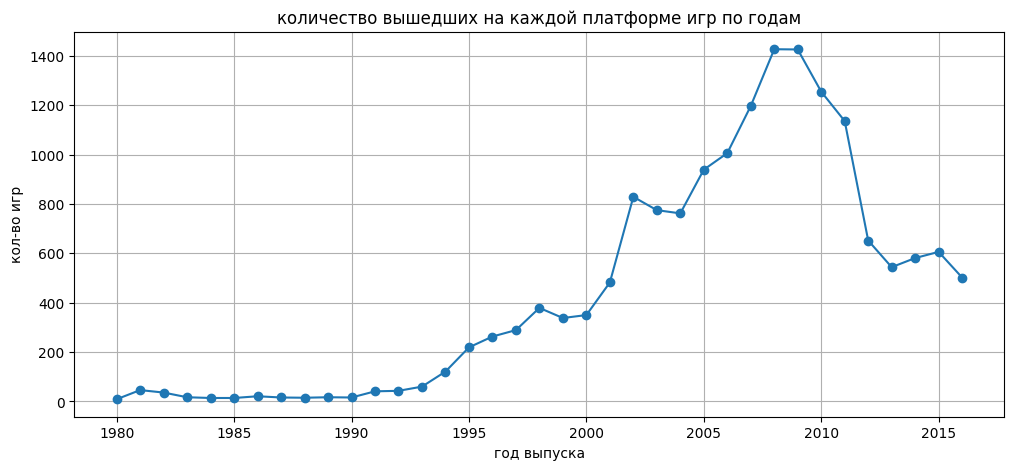

In [41]:
(df.pivot_table(index='year_of_release', \
               values='name', \
               aggfunc='count')
 .plot(figsize=(12,5), \
       grid=True, \
       style='o-', \
       legend=False, \
       xlabel='год выпуска', \
       ylabel='кол-во игр', \
       title='количество вышедших на каждой платформе игр по годам'));

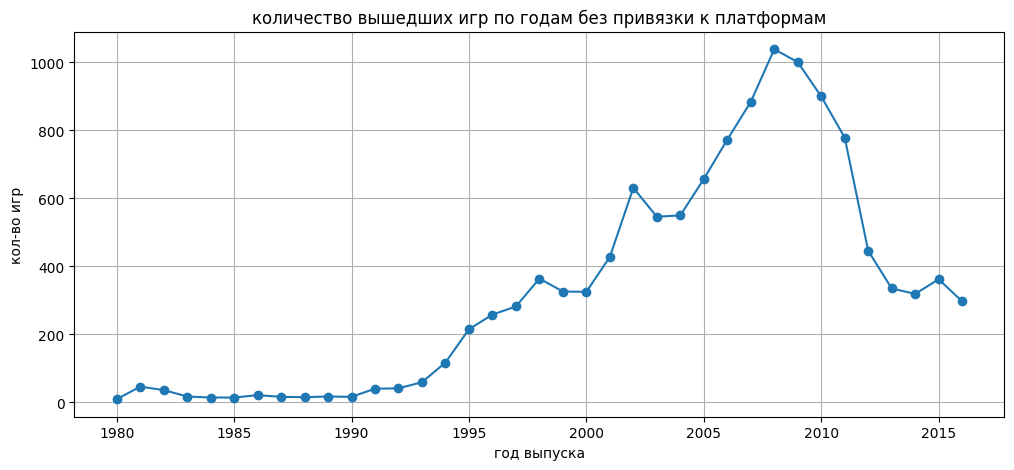

In [42]:
(df.drop_duplicates(subset=['name', 'year_of_release'], \
                    keep='first')
 .pivot_table(index='year_of_release', \
               values='name', \
               aggfunc='count')
 .plot(figsize=(12,5), \
       grid=True, \
       style='o-', \
       legend=False, \
       xlabel='год выпуска', \
       ylabel='кол-во игр', \
       title='количество вышедших игр по годам без привязки к платформам'));

___
По графикам видно, что активный рост игровой промышленности начался в 1993-1994 годах, достиг пика в 2008 году и пошел на спад. Вероятно, в это время у игр начали увеличиваться бюджеты, усложняться производство и т.д., из-за этого срок производства, равно как и качество, увеличились.\
При сравнении двух графиков мы видим, что в промежутке с 2002-го по 2012-й года наблюдается значительная разница между количеством вышедших игр с привязкой к платформе и без привязки к ней. Следовательно, в это время было самое большое разнообразие возможных способов игры.
___

In [43]:
df.loc[df['year_of_release'] <= 1995, 'year_of_release'].value_counts().sort_index().to_frame()

,year_of_release
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15
1989.0,17


___
Можно сказать, что рассматривать года до 1992 года включительно нет особого смысла, ввиду значительно меньшего, по сравнению с остальными, количества вышедших игр
___
___
Посмотрим на продажи по платформам
___

In [44]:
(df.groupby('platform')
 .agg({'total_sales':'sum'})
 .sort_values(by='total_sales', ascending=False)
 .head(10))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


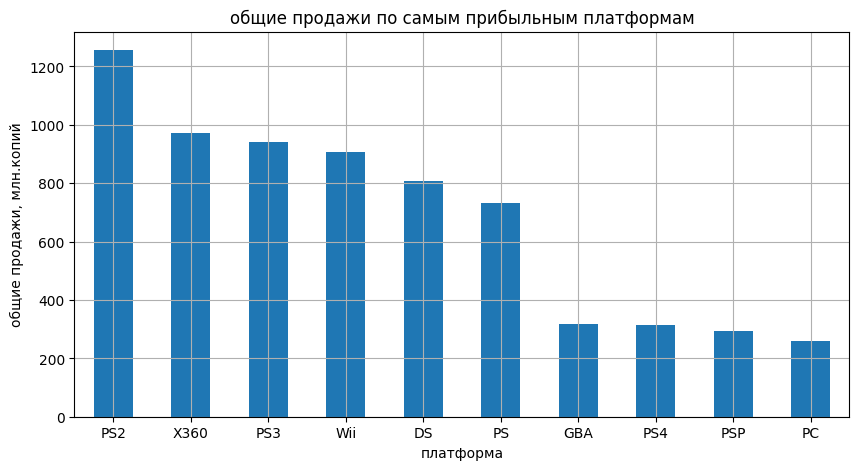

In [45]:
(df.groupby('platform')
 .agg({'total_sales':'sum'})
 .sort_values(by='total_sales', ascending=False)
 .head(10)
 .plot(figsize=(10,5), \
       grid=True, \
       kind='bar', \
       legend=False, \
       ylabel='общие продажи, млн.копий', \
       xlabel='платформа', \
       title='общие продажи по самым прибыльным платформам', \
       rot=0));

In [46]:
top_ten_sales = (df.groupby('platform')
                   .agg({'total_sales':'sum'})
                   .sort_values(by='total_sales', ascending=False)
                   .head(10)
                   .index
                   .to_list())

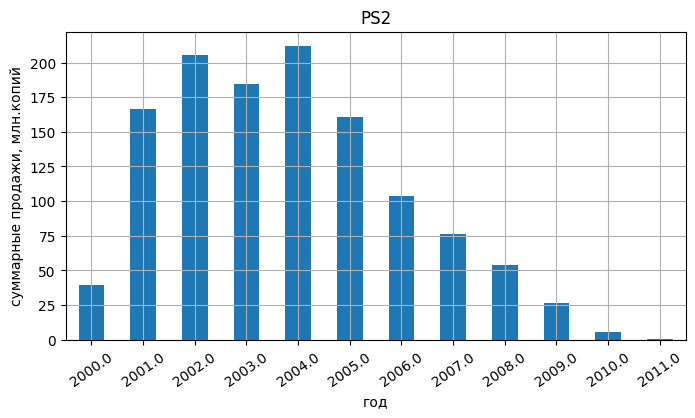

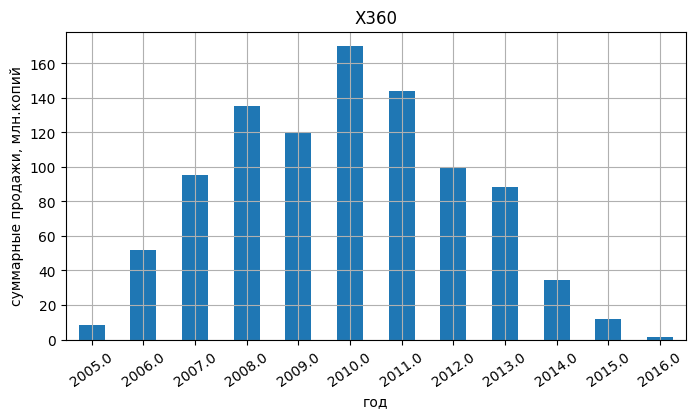

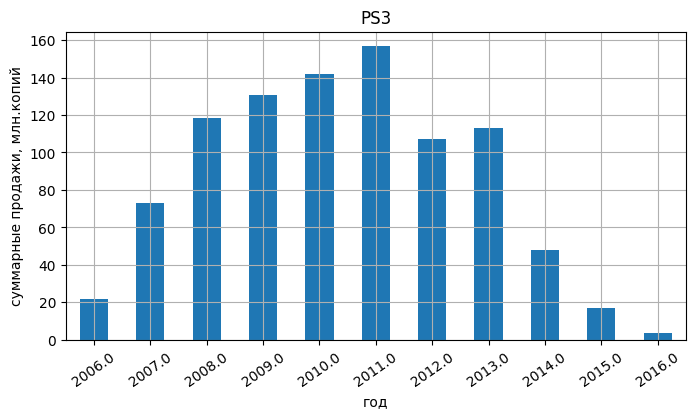

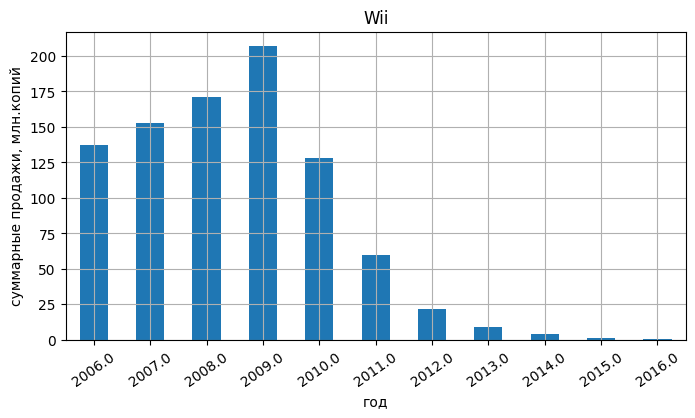

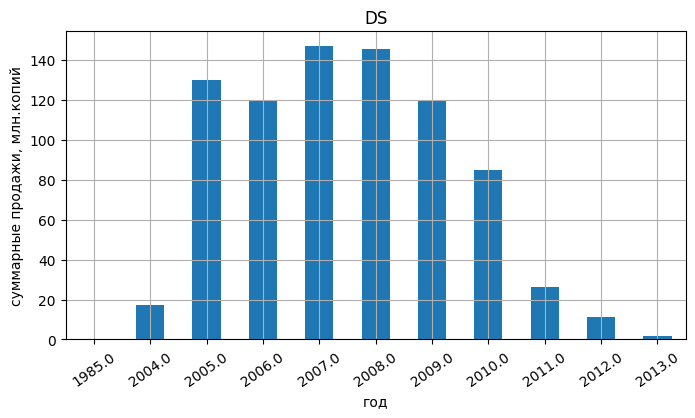

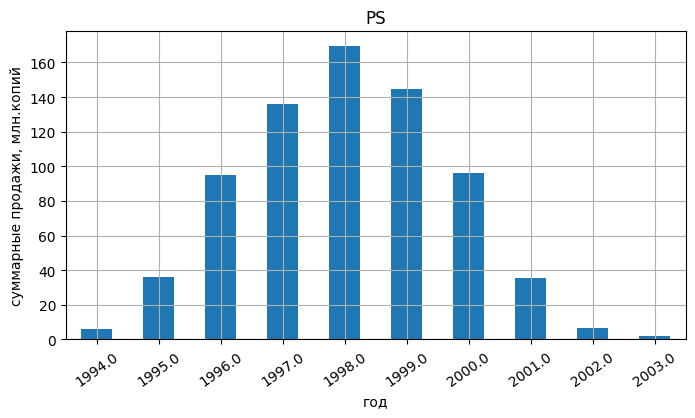

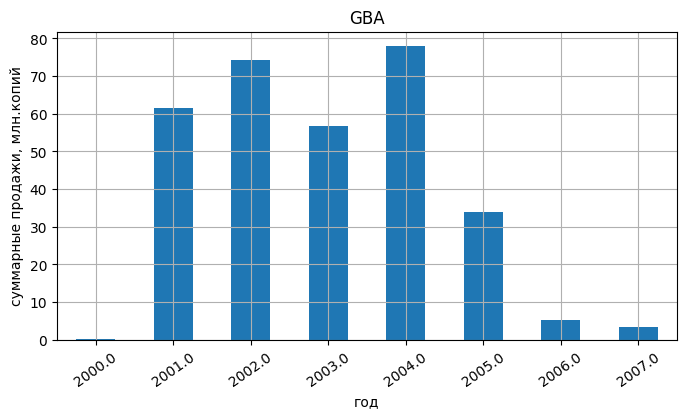

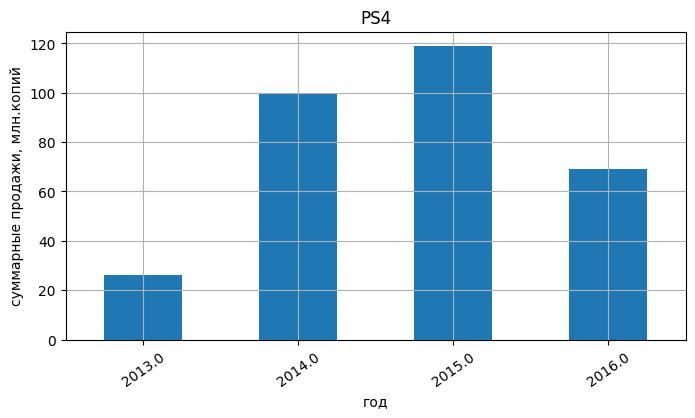

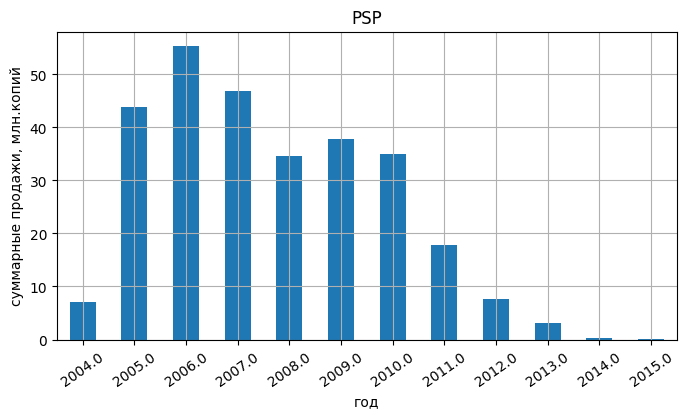

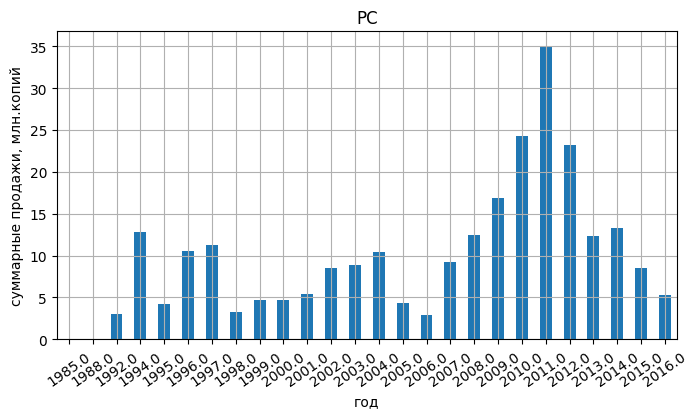

In [47]:
for platform in top_ten_sales:
    (df.loc[df['platform'] == platform]
     .pivot_table(index='year_of_release', \
                  values='total_sales', \
                  aggfunc='sum')
     .plot(kind='bar', \
           figsize=(8,4), \
           legend=False, \
           grid=True, \
           rot=35, \
           xlabel='год', \
           ylabel='суммарные продажи, млн.копий', \
           title=platform))

In [48]:
df.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,58.309353,6.517778,NaN,0.02


___
Видно, что в общем и целом распределение близко к биномиальному, за исключением платформы ПК, в которой наблюдается достаточно много пиков в левой части графика.

В целом, средний "срок жизни" платформ равен 10 ± 1 лет
___

In [49]:
df.query('platform == "XOne" or platform == "PSV"')['year_of_release'].unique()

array([2015., 2014., 2013., 2016., 2011., 2012.,   nan])

___
В дальнейшем исследовании мы будем использовать только данные с 2012-го года включительно, как данные за наиболее актуальный период. Поместим эти данные в отдельную переменную.
___

In [50]:
df1 = df.loc[df['year_of_release'] >= 2012].copy()

___
Посмотрим на динамику продаж по каждой платформе по годам
___

In [51]:
platforms = df1['platform'].unique()

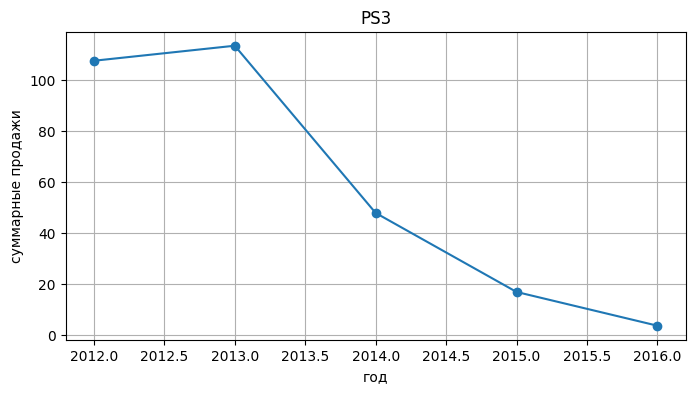

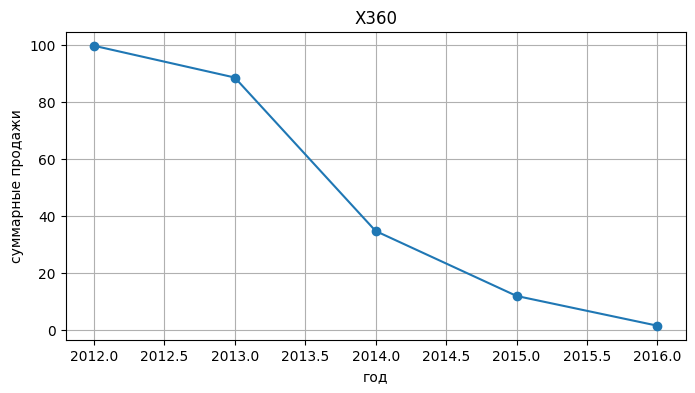

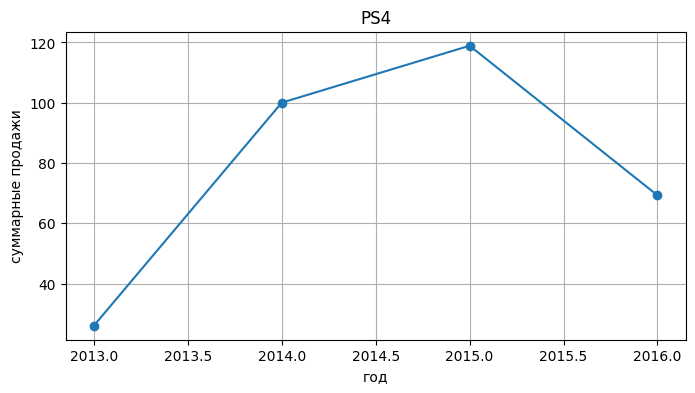

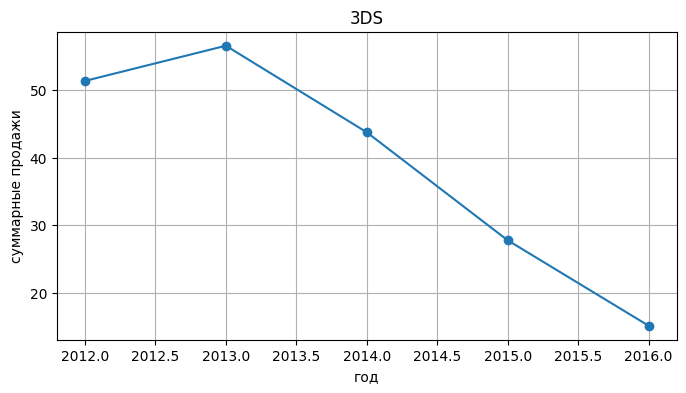

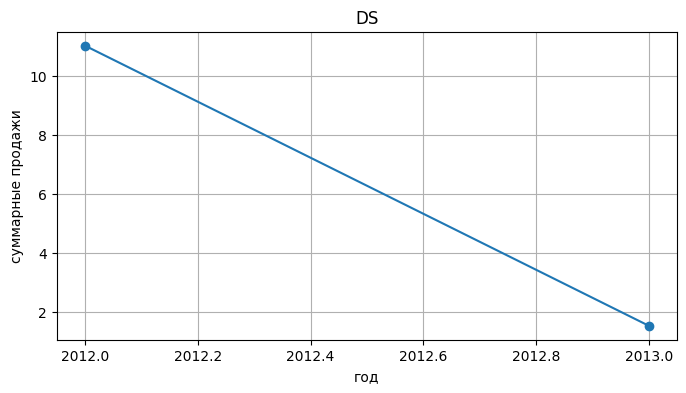

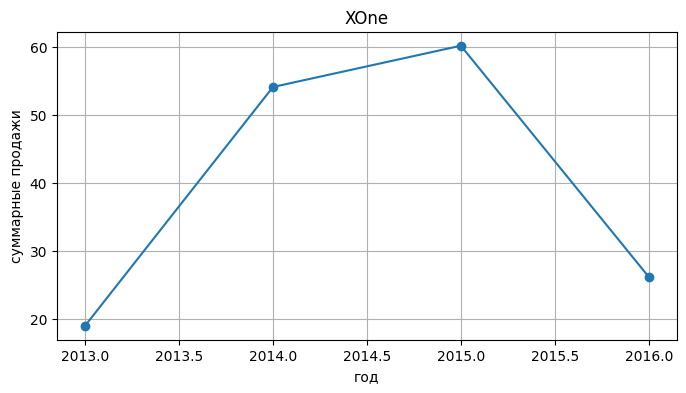

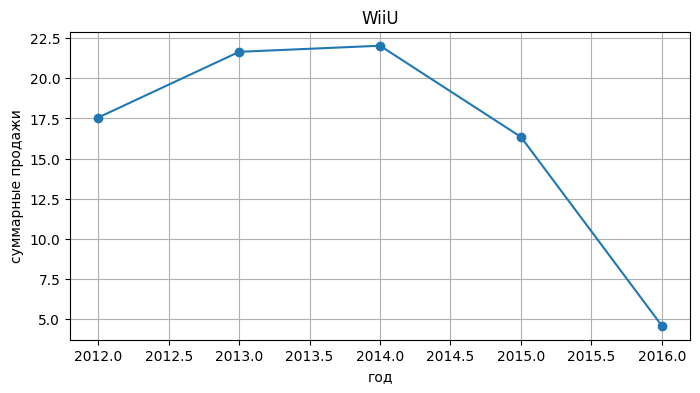

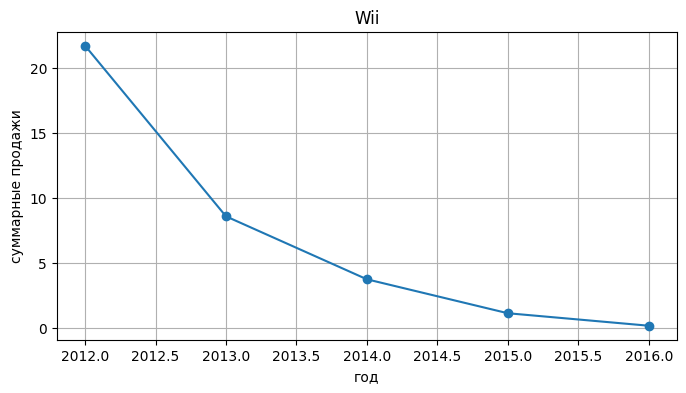

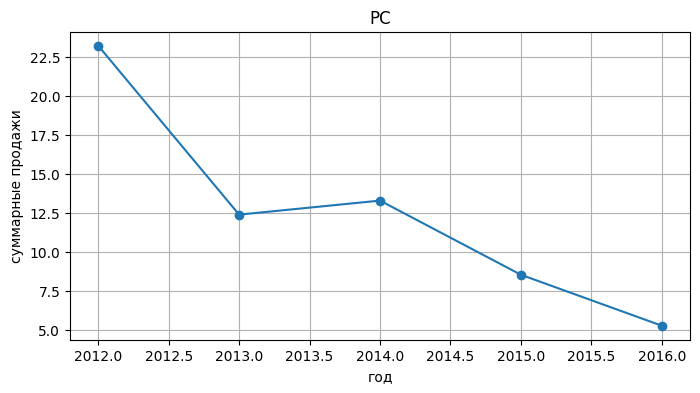

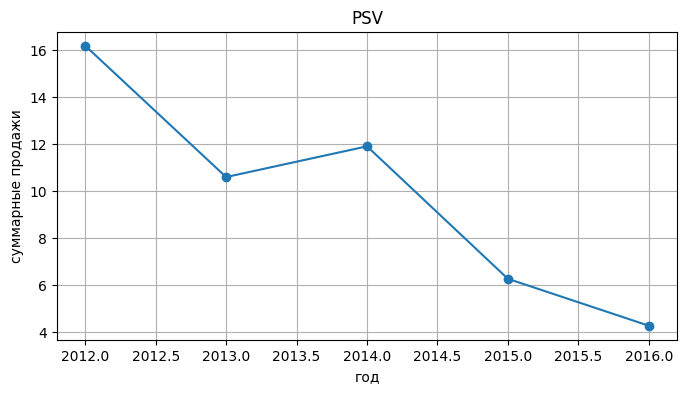

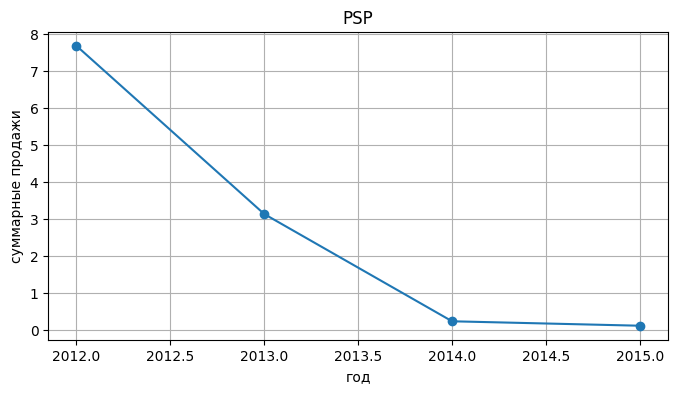

In [52]:
for platform in platforms:
    (df1.loc[df['platform'] == platform]
     .pivot_table(index='year_of_release', \
                  values='total_sales', \
                  aggfunc='sum')
     .plot(figsize=(8,4), \
           style='o-', \
           legend=False, \
           grid=True, \
           rot=0, \
           xlabel='год', \
           ylabel='суммарные продажи', \
           title=platform))

In [53]:
print('кол-во записей для 2015го:', df1.query('year_of_release == 2015')['name'].count())
print('кол-во записей для 2016го:', df1.query('year_of_release == 2016')['name'].count())

кол-во записей для 2015го: 606
кол-во записей для 2016го: 502


___
Итак, можем заметить, что:
- практически на всех платформах наблюдается снижение количества проданных копий игр
- рост заметен на платформах PS4 и XboxOne, с просадкой в 2016-м году, что можно объяснить неполнотой данных (меньшим количеством записей) по сравнению с 2015-м годом
- на первом месте по продажам находится PS4, на втором - XboxOne
___
___
Посмотрим на глобальные продажи игр в разбивке по платформам
___

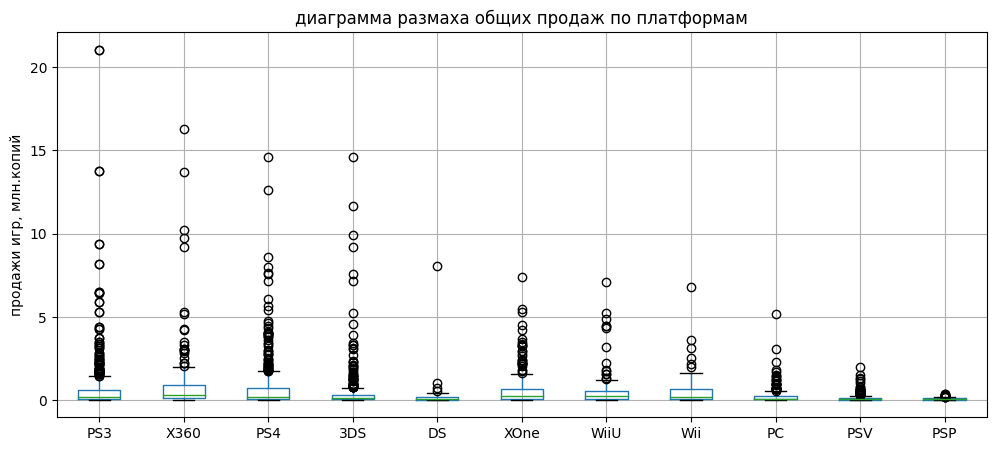

In [54]:
df_boxplot = pd.DataFrame(columns=['PS3'], \
                          data=(df1.loc[df1['platform'] == 'PS3', 'total_sales'].to_list()))

for platform in df1['platform'].unique():
    df_platform = pd.DataFrame(columns=[f'{platform}'], \
                               data=(df1.loc[df1['platform'] == platform, 'total_sales'].to_list()))
    df_boxplot = pd.concat([df_boxplot, df_platform])

(df_boxplot.plot(kind='box', \
                 figsize=(12,5), \
                 grid=True, \
                 xlabel='платформа', \
                 ylabel='продажи игр, млн.копий', \
                 title='диаграмма размаха общих продаж по платформам'));

(0.0, 1.0)

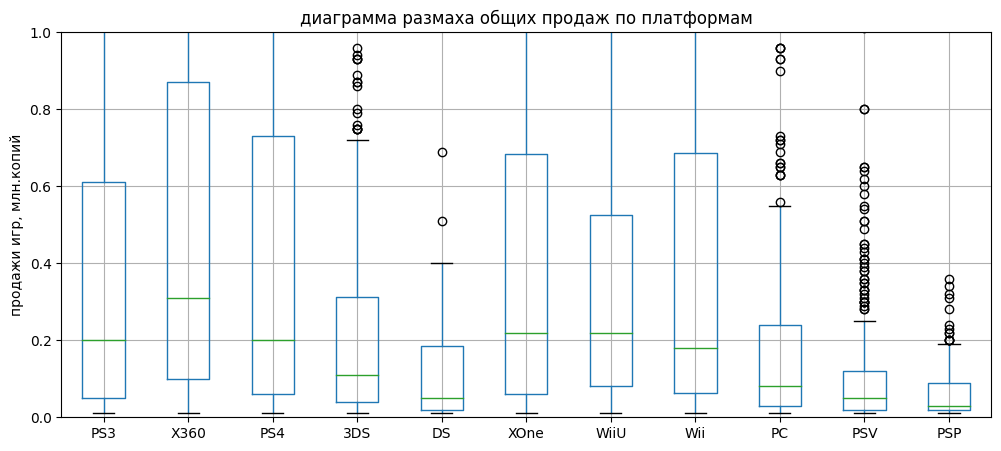

In [55]:
(df_boxplot.plot(kind='box', \
                 figsize=(12,5), \
                 grid=True, \
                 xlabel='платформа', \
                 ylabel='продажи игр, млн.копий', \
                 title='диаграмма размаха общих продаж по платформам'));
plt.ylim(0,1)

___
Видим, что:
- платформы PS3, PS4, Xbox 360 и Nintendo 3DS имеют игры, продавшиеся более чем в 10 млн.копий
- самые высокий медианные значения продаж у Xbox 360, Xbox One и Nintendo WiiU
- Nintendo 3DS очень нестабильная платформа - у нее достаточно "плоский" разброс между 2 и 3 квартилями, при этом большое количество выбросов
- Xbox 360 наоборот, самая стабильная из всех и имеет широкий и самый высокий размах между 2 и 3 квартилями
- PSVita и PSP самые слабые платформы из всех
___
___
Посмотрим, насколько сильно влияют на продажи отзывы критиков и пользователей. Рассмотри это на примере платформы PS4, как наиболее прибыльной
___

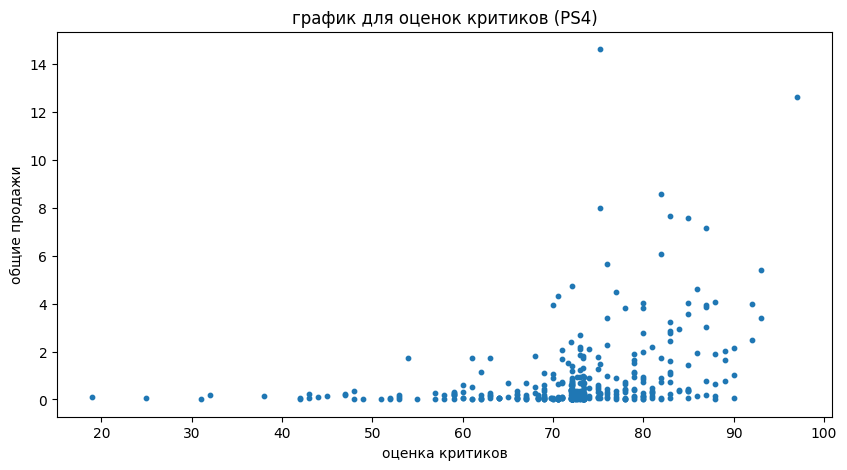

In [56]:
(df1.query('platform == "PS4"')
 .plot(kind='scatter', \
       x='critic_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка критиков', \
       title='график для оценок критиков (PS4)'));

In [57]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'PS4', 'critic_score']
                           .corr(df1.loc[df1['platform'] == 'PS4', 'total_sales'])))

коэф.корреляции: 0.3394909984353696


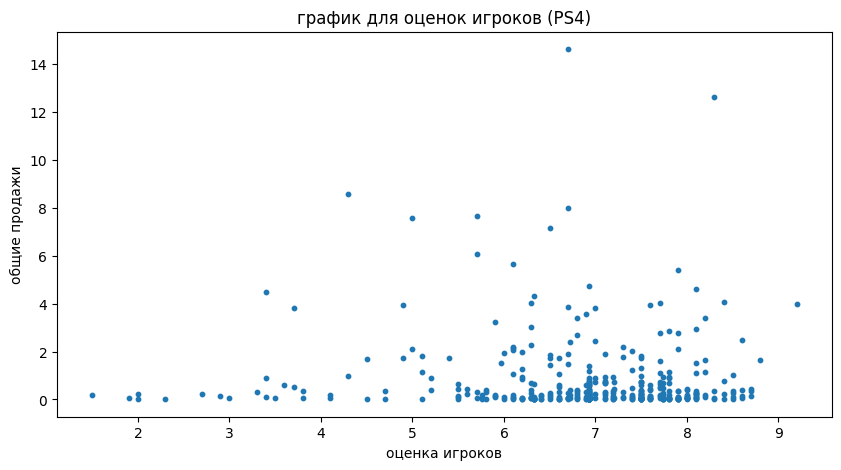

In [58]:
(df1.query('platform == "PS4"')
 .plot(kind='scatter', \
       x='user_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка игроков', \
       title='график для оценок игроков (PS4)'));

In [59]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'PS4', 'user_score']
                           .corr(df1.loc[df1['platform'] == 'PS4', 'total_sales'])))

коэф.корреляции: -0.053663226502586835


___
Из данных видим, что:
- оценки игроков практически не связаны с показателями продаж игр и наоборот - на графике не видно никакой взаимосвязи
- линейной корреляции оценок игроков с продажами не наблюдается
- оценки критиков в большей степени взаимосвязаны с коммерческим успехом игр, в этом случае разброс точек не такой существенный, и все игры с большим количеством проданных копий имеют оценку выше 70, однако нельзя с уверенностью сказать о причинно-следственной связи этих двух показателей
- между оценками критиков и продажами игр присутствует слабовыраженная линейная корреляция
___
___
Рассмотрим Xbox One
___

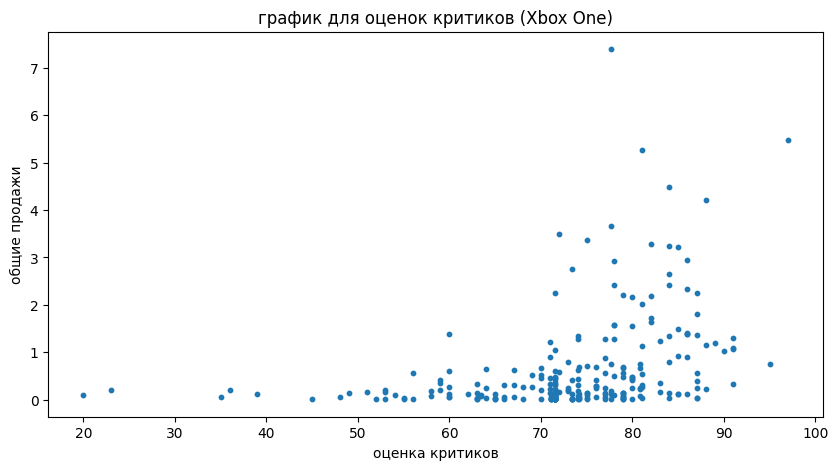

In [60]:
(df1.query('platform == "XOne"')
 .plot(kind='scatter', \
       x='critic_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка критиков', \
       title='график для оценок критиков (Xbox One)'));

In [61]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'XOne', 'critic_score']
                           .corr(df1.loc[df1['platform'] == 'XOne', 'total_sales'])))

коэф.корреляции: 0.3549441011449924


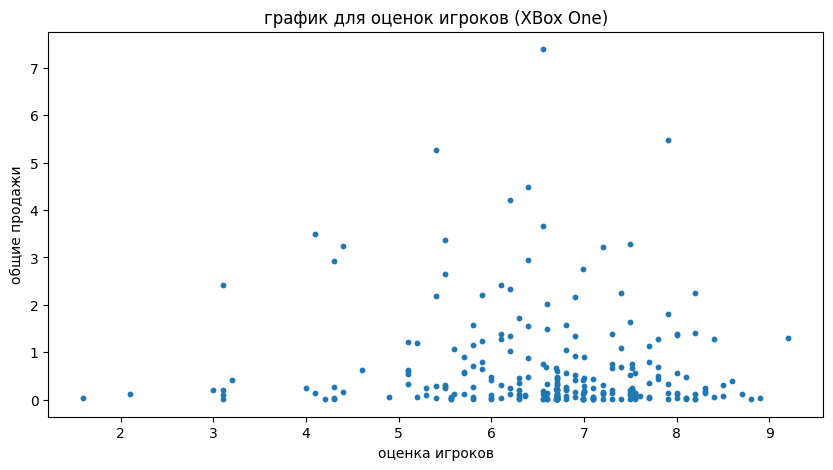

In [62]:
(df1.query('platform == "XOne"')
 .plot(kind='scatter', \
       x='user_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка игроков', \
       title='график для оценок игроков (XBox One)'));

In [63]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'XOne', 'user_score']
                           .corr(df1.loc[df1['platform'] == 'XOne', 'total_sales'])))

коэф.корреляции: -0.0712213023781151


___
У Xbox One результаты практически такие же, как и у PS4 
___
___
Теперь рассмотрим персональные компьютеры
___

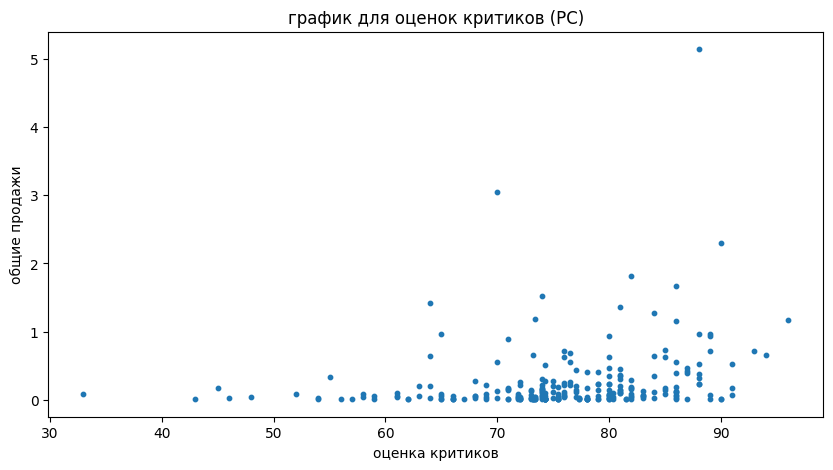

In [64]:
(df1.query('platform == "PC"')
 .plot(kind='scatter', \
       x='critic_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка критиков', \
       title='график для оценок критиков (PC)'));

In [65]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'PC', 'critic_score']
                           .corr(df1.loc[df1['platform'] == 'PC', 'total_sales'])))

коэф.корреляции: 0.22860875774642933


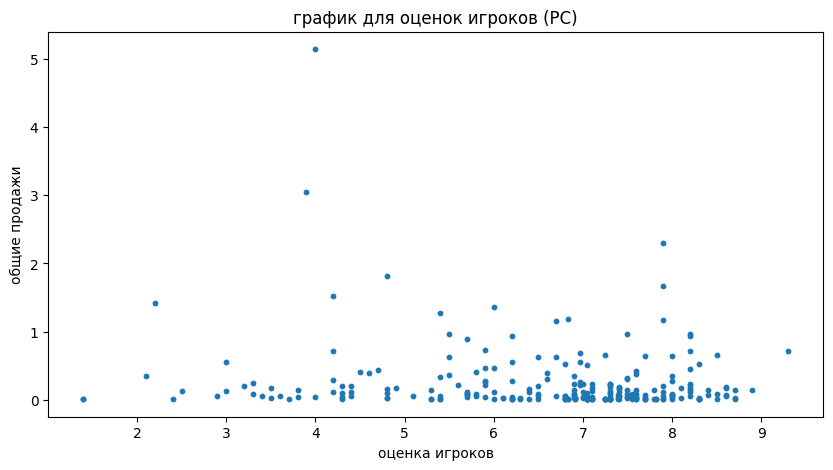

In [66]:
(df1.query('platform == "PC"')
 .plot(kind='scatter', \
       x='user_score', \
       y='total_sales', \
       figsize=(10,5), \
       s=10, \
       ylabel='общие продажи', \
       xlabel='оценка игроков', \
       title='график для оценок игроков (PC)'));

In [67]:
print('коэф.корреляции:', (df1.loc[df1['platform'] == 'PC', 'user_score']
                           .corr(df1.loc[df1['platform'] == 'PC', 'total_sales'])))

коэф.корреляции: -0.14304249771681604


___
На ПК взаимосвязь оценок с продажами еще более слабовыраженная, чем на PS4 и Xbox One
___
___
В целом, если обобщить, то можно сказать, что если игра выходит на PS4 или XboxOne и критики ее хвалят, то у этой игры больше шансов обрести коммерческий успех, нежели у игры на другой платформе с худшими оценками экспертов, при прочих равных.
___

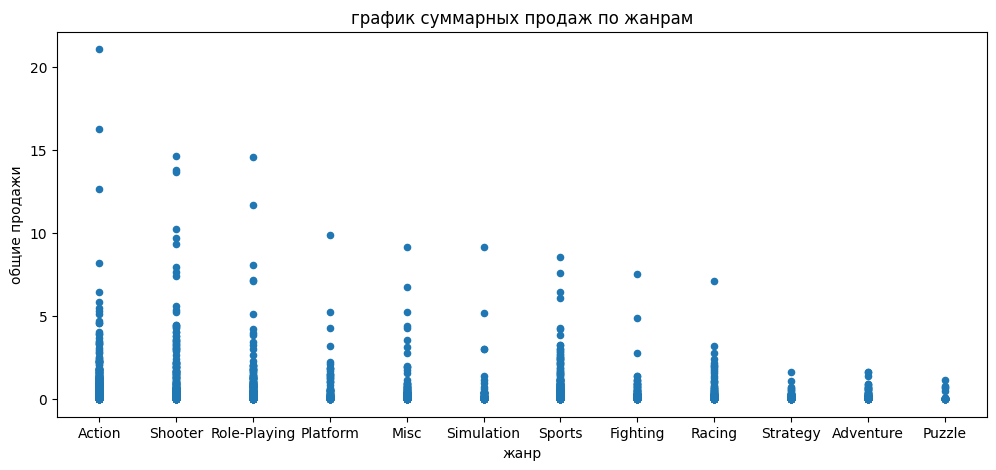

In [68]:
(df1.plot(kind='scatter', \
          x='genre', \
          y='total_sales', \
          figsize=(12,5), \
          #s=10, \
          ylabel='общие продажи', \
          xlabel='жанр', \
          title='график суммарных продаж по жанрам'));

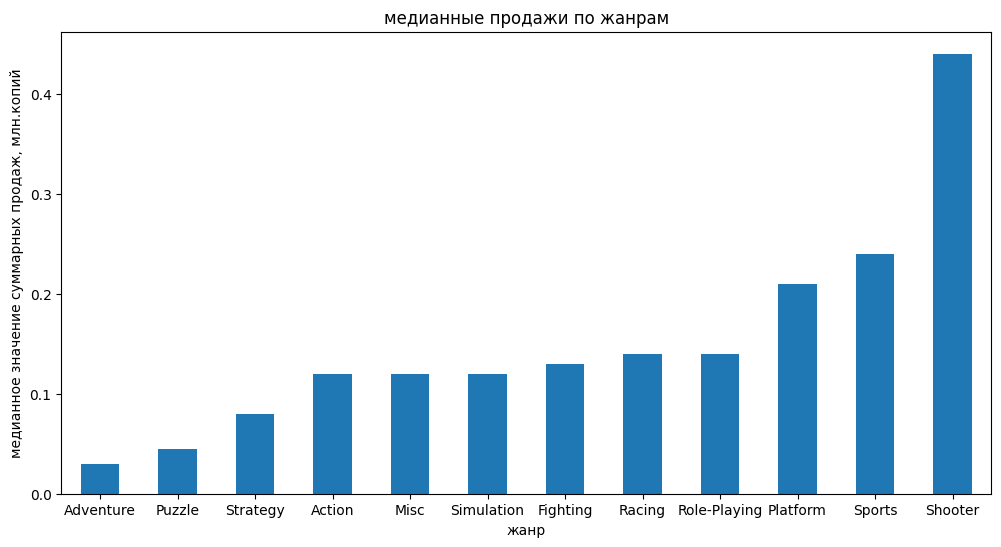

In [69]:
(df1.pivot_table(index='genre', \
                 values='total_sales', \
                 aggfunc='median')
 .sort_values(by='total_sales')
 .plot(kind='bar', \
       legend=False, \
       figsize=(12,6), \
       rot=0, \
       xlabel='жанр', \
       ylabel='медианное значение суммарных продаж, млн.копий', \
       title='медианные продажи по жанрам'));

___
Рассмотрев медианные и суммарные продажи по каждому жанру мы видим, что:
1. Жанр *шутера* в среднем самый прибыльный, и вдвое-втрое обгоняет по показателю медианных продаж любой другой жанра
2. Жанры *спортивных игр* и *платформеры* показывают хорошие и достаточно стабильные результаты по медианным продажам
3. Жанры *стратегии*, *приключения* и *паззла* показывают самые слабые результаты по уровню продаж
4. В жанрах *экшен* и *ролевая игра* есть несколько выдающихся по продажам игр, но в среднем, как и все остальные жанры, они показывают невысокие результаты продаж
___

**Выводы:**
- Мы выявили актуальную выборку данных для исследования
- Определили самые прибыльные платформы и жанры игр
- Изучили влияние оценок критиков и игроков на продажи

Далее мы продолжим исследование данных и составим портрет типичного пользователя для каждого региона 

## Составление портретов пользователей по регионам

### Североамериканский регион

___
Для начала рассмотрим Северную Америку. Посмотрим на самые прибыльные платформы
___

In [70]:
na_sales_platform = (df1.pivot_table(index='platform', \
                                     values='na_sales', \
                                     aggfunc='sum')
                     .sort_values(by='na_sales', \
                                  ascending=False))
na_sales_platform['sales_percentage'] = round(na_sales_platform['na_sales']*100/(sum(na_sales_platform['na_sales'])), 2)
na_sales_platform = na_sales_platform.head(5)
na_sales_platform.columns = ['общие продажи', 'процент продаж']
na_sales_platform

,общие продажи,процент продаж
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


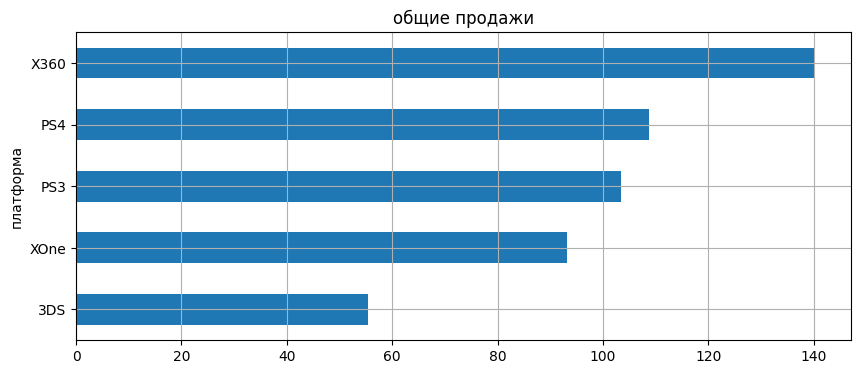

In [71]:
(na_sales_platform['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='платформа', \
       figsize=(10,4), \
       title='общие продажи'));

___
В Северной Америке по продажам лидируют последние два поколения консолей PlayStation и Xbox, суммарно занимая 75% всего рынка и значительно опережая все остальные платформы.\
На удивление, предыдущие поколения занимают 1-е и 3-е места по продажам, идя вровень с новыми поколениями.\
На пятом месте находится портативная консоль от Nintendo.
___
___
Теперь рассмотрим различия по жанрам в этом регионе
___

In [72]:
na_sales_genre = (df1.pivot_table(index='genre', \
                                  values='na_sales', \
                                  aggfunc='sum')
                     .sort_values(by='na_sales', \
                                  ascending=False))
na_sales_genre['sales_percentage'] = round(na_sales_genre['na_sales']*100/(sum(na_sales_genre['na_sales'])), 2)
na_sales_genre = na_sales_genre.head(5)
na_sales_genre.columns = ['общие продажи', 'процент продаж']
na_sales_genre

,общие продажи,процент продаж
genre,,
Action,177.84,30.09
Shooter,144.77,24.50
Sports,81.53,13.80
Role-Playing,64.00,10.83
Misc,38.19,6.46


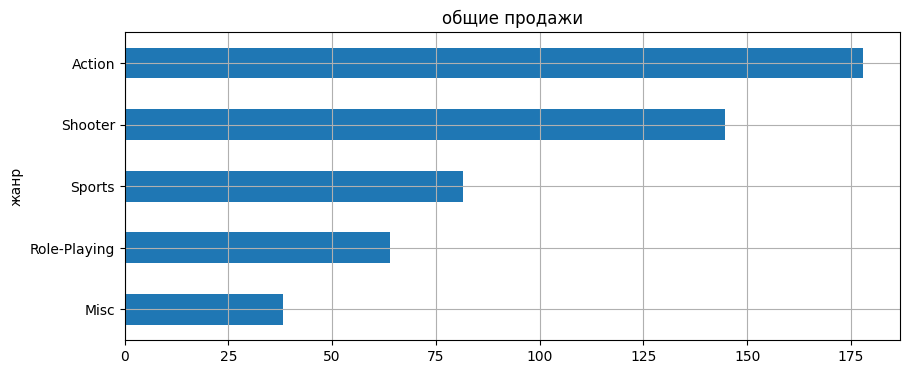

In [73]:
(na_sales_genre['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='жанр', \
       figsize=(10,4), \
       title='общие продажи'));

___
Самые популярные жанры в Америке - экшен и шутер: суммарно они занимают больше половины рынка.\
Также в этом регионе любят спортивные игры (что необычно) и ролевые - они на третьем и четвертом месте.\
На пятом месте находятся жанры, не подходящие подо все основные жанры.
___
___
Посмотрим, влияет ли продажи рейтинг ESRB
___

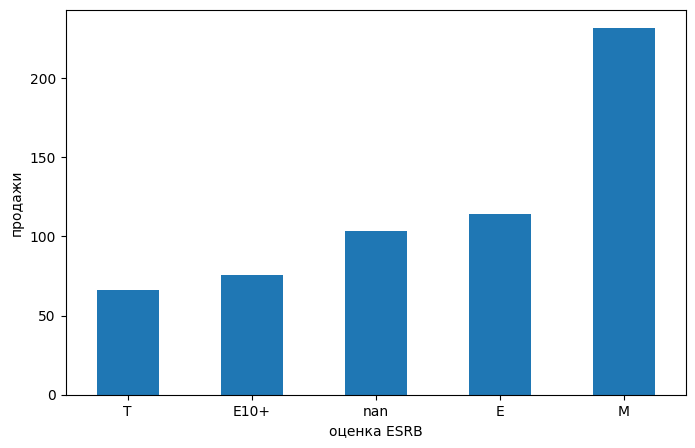

In [74]:
(df1.groupby('rating', dropna=False)
 .agg({'na_sales':'sum'})
 .sort_values(by='na_sales')
 .plot(kind='bar', \
       y='na_sales', \
       figsize=(8,5), \
       rot=0, \
       legend=False, \
       xlabel='оценка ESRB', \
       ylabel='продажи'));

___
В Америке больше остальных любят игры с категорией M - for Mature (для лиц старше 17), продажи игр в этом жанре более чем вдвое выше, чем в остальных, что соответствует любви к жанру шутер, в котором большинство игр как раз в этом жанре.\
На втором и третьем местах находятся игры без рейтинга и с рейтингом E - для всех.\
Остальные категории показывают себя еще хуже.
___

### Европейский регион

___
Теперь можно переходить к Европе, и изучить те же характеристики
___

In [75]:
eu_sales_platform = (df1.pivot_table(index='platform', \
                                     values='eu_sales', \
                                     aggfunc='sum')
                     .sort_values(by='eu_sales', \
                                  ascending=False))
eu_sales_platform['sales_percentage'] = round(eu_sales_platform['eu_sales']*100/(sum(eu_sales_platform['eu_sales'])), 2)
eu_sales_platform = eu_sales_platform.head(5)
eu_sales_platform.columns = ['общие продажи', 'процент продаж']
eu_sales_platform

,общие продажи,процент продаж
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


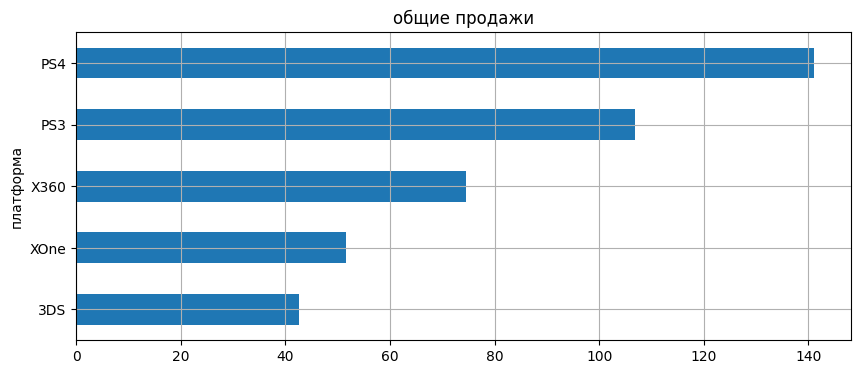

In [76]:
(eu_sales_platform['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='платформа', \
       figsize=(10,4), \
       title='общие продажи'));

___
В Европе по продажам лидируют последние два поколения консолей PlayStation, при этом последнее поколение находится на первом месте, занимая четверть всех продаж.\
На третьем и четвертом местах находятся Xbox-ы, и на сей раз предыдущее поколение опережает последнее в 1,5 раза.\
На пятом месте, как и в Америке, находится портативная консоль от Nintendo.
___
___
Переходим к жанрам
___

In [77]:
eu_sales_genre = (df1.pivot_table(index='genre', \
                                  values='eu_sales', \
                                  aggfunc='sum')
                     .sort_values(by='eu_sales', \
                                  ascending=False))
eu_sales_genre['sales_percentage'] = round(eu_sales_genre['eu_sales']*100/(sum(eu_sales_genre['eu_sales'])), 2)
eu_sales_genre = eu_sales_genre.head(5)
eu_sales_genre.columns = ['общие продажи', 'процент продаж']
eu_sales_genre

,общие продажи,процент продаж
genre,,
Action,159.34,31.44
Shooter,113.47,22.39
Sports,69.09,13.63
Role-Playing,48.53,9.58
Racing,27.29,5.38


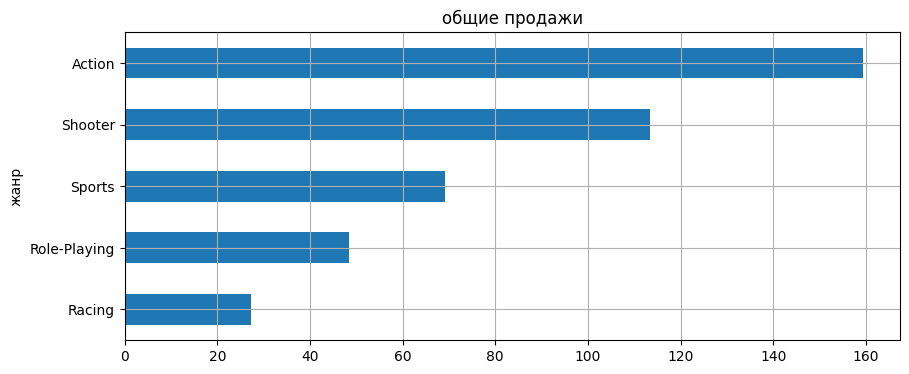

In [78]:
(eu_sales_genre['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='жанр', \
       figsize=(10,4), \
       title='общие продажи'));

___
Самые популярные жанры в Европе почти те же, что в Америке - экшен, шутер, спорт и ролевые, при этом процентное распределение практически такое же.\
На пятом месте, однако, находятся гоночные игры, занимая 5% рынка игр.
___
___
Наконец, посмотрим на зависимость продаж от рейтинга ESRB
___

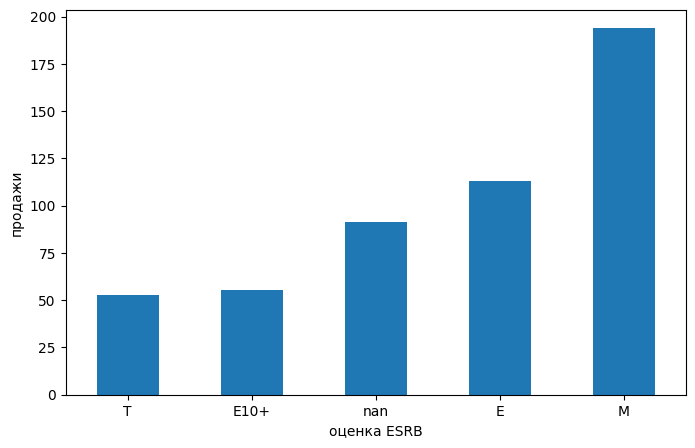

In [79]:
(df1.groupby('rating', dropna=False)
 .agg({'eu_sales':'sum'})
 .sort_values(by='eu_sales')
 .plot(kind='bar', \
       y='eu_sales', \
       figsize=(8,5), \
       rot=0, \
       legend=False, \
       xlabel='оценка ESRB', \
       ylabel='продажи'));

___
Распределение продаж по рейтингу ESRB в Европе более плавное, чем в Америке, однако распределение по местам такое же:\
M(17+) -- E(для всех) -- без рейтинга -- E10+ -- T(13+).
___

### Японский регион

___
Наконец, изучим Японский рынок
___

In [80]:
jp_sales_platform = (df1.pivot_table(index='platform', \
                                     values='jp_sales', \
                                     aggfunc='sum')
                     .sort_values(by='jp_sales', \
                                  ascending=False))
jp_sales_platform['sales_percentage'] = round(jp_sales_platform['jp_sales']*100/(sum(jp_sales_platform['jp_sales'])), 2)
jp_sales_platform = jp_sales_platform.head(5)
jp_sales_platform.columns = ['общие продажи', 'процент продаж']
jp_sales_platform

,общие продажи,процент продаж
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


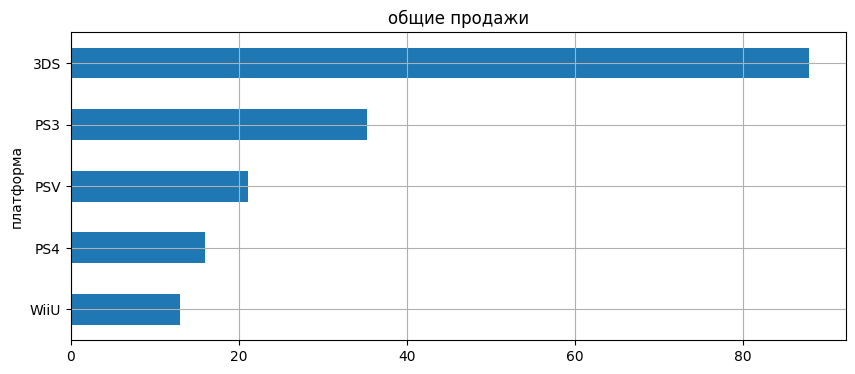

In [81]:
(jp_sales_platform['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='платформа', \
       figsize=(10,4), \
       title='общие продажи'));

___
Япония кардинально отличается от остальных регионов. Здесь в почете местные производители консолей - Sony и Nintendo.\
Первое место тут занимает портативная консоль от Nintendo - 3DS, единолично захватившая почти половину рынка игр.\
На 2-4х местах расположены консоли от Sony, при этом опять предыдущее поколение опережает последние. Что примечательно, на третьем месте тут снова портативная консоль, на сей раз PSVita, которой не было в топах предыдущих регионов\
На пятом месте расположена WiiU, которой также не было в прошлых регионах.
___
___
Посмотрим на популярные в Японии жанры
___

In [82]:
jp_sales_genre = (df1.pivot_table(index='genre', \
                                  values='jp_sales', \
                                  aggfunc='sum')
                     .sort_values(by='jp_sales', \
                                  ascending=False))
jp_sales_genre['sales_percentage'] = round(jp_sales_genre['jp_sales']*100/(sum(jp_sales_genre['jp_sales'])), 2)
jp_sales_genre = jp_sales_genre.head(5)
jp_sales_genre.columns = ['общие продажи', 'процент продаж']
jp_sales_genre

,общие продажи,процент продаж
genre,,
Role-Playing,65.44,33.98
Action,52.80,27.42
Misc,12.86,6.68
Simulation,10.41,5.41
Fighting,9.44,4.90


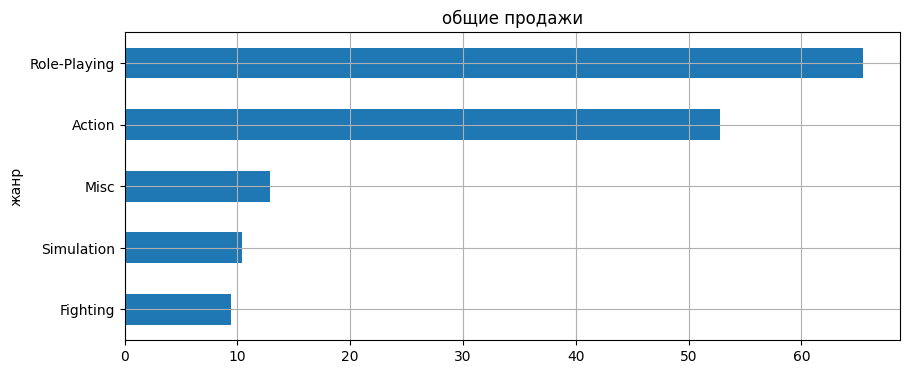

In [83]:
(jp_sales_genre['общие продажи'].sort_values()
 .plot(kind='barh', \
       grid=True, \
       legend=False, \
       xlabel='жанр', \
       figsize=(10,4), \
       title='общие продажи'));

___
Вновь видим отличия - в Японии больше всего любят ролевые игры: они занимают треть рынка в этом регионе. На втором месте экшен, также с внушительными продажами.\
На 3-м, 4-м и 5-м местах расположились жанры, не подходящие под основные, симуляторы и файтинги, соответственно. У всех них значительно меньший процент на рынке - примерно 5-6%.
___
___
И затем посмотрим на рейтинги ESRB
___

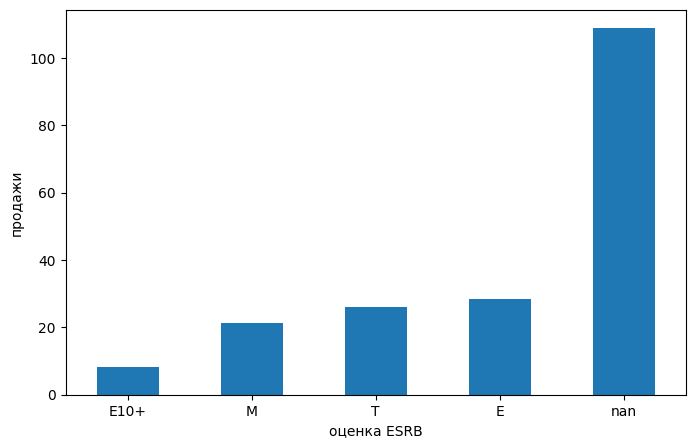

In [84]:
(df1.groupby('rating', dropna=False)
 .agg({'jp_sales':'sum'})
 .sort_values(by='jp_sales')
 .plot(kind='bar', \
       y='jp_sales', \
       figsize=(8,5), \
       rot=0, \
       legend=False, \
       xlabel='оценка ESRB', \
       ylabel='продажи'));

___
В распределении продаж по оценкам ESRB также видим существенные отличия: в Японии самые популярные игры не имеют рейтинга. Вероятно, это связано с тем, что японцы предпочитают (как и в случае с платформами) местный продукт, который не доходит до рынка Америки и/или не оценивается этой организацией\
На 2м - 4м местах располагаются жанры E, T и M.\
Ну и наконец, игры E10+ здесь, как и везде, имеют маленькие продажи.
___

**Выводы:**
- Мы изучили портреты игроков трех основных регионов: Северной Америки, Европы и Японии
- Игроки в Америке и Европе мало чем отличаются друг от друга
- Японские игроки значительно отличаются по покупательскому поведению от остальных

Мы переходим к финальной части исследования - проверке гипотез

## Проверка гипотез

___
Для начала мы проверим гипотезу о равенстве среднего пользовательского рейтинга рейтинга игр на платформах Xbox One и PC

Гипотезы сформулируем следующим образом:\
*H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые* \
*H₁ - средние пользовательские рейтинги платформ Xbox One и PC различаются*
___

In [86]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.loc[df_raw['user_score'] == 'tbd', 'user_score'] = np.nan
df_raw['user_score'] = df_raw['user_score'].astype('float')
df_raw.dropna(subset=['user_score'], inplace=True)

In [87]:
hypothesis_1 = st.ttest_ind(df_raw.loc[df_raw['platform'] == 'XOne', 'user_score'], \
                            df_raw.loc[df_raw['platform'] == 'PC', 'user_score'])
hypothesis_1.pvalue

1.3896435533548819e-05

In [88]:
if hypothesis_1.pvalue < 0.01:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

отвергаем нулевую гипотезу


___
Мы отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги этих двух платформ одинаковые, следовательно, мы не можем с уверенностью сказать о равенстве (или похожести) пользовательских оценок между платформами Xbox One и PC
___
___
Далее мы проверим другую гипотезу: о том, что пользовательские оценки жанров экшен и спортивных игр отличаются

Формулируем гипотезы:\
*H₀ - cредние пользовательские рейтинги жанров экшен и спортивных игр различаются* \
*H₁ - cредние пользовательские рейтинги жанров экшен и спортивных игр одинаковые*
___

In [89]:
hypothesis_2 = st.ttest_ind(df_raw.loc[df_raw['genre'] == 'Action', 'user_score'], \
                            df_raw.loc[df_raw['genre'] == 'Sports', 'user_score'])
hypothesis_2.pvalue

0.10406951359049141

In [90]:
if hypothesis_2.pvalue > 0.01:
    print('отвергаем нулевую гипотезу')
else:
    print('не получилось отвергнуть нулевую гипотезу')

отвергаем нулевую гипотезу


___
Мы овергаем нулевую гипотезу о том, что средние пользовательские рейтинги этих двух жанров разные, следовательно, мы не можем с уверенностью сказать о разнице пользовательских оценок между жанрами экшен и спортивных игр
___

**Выводы:**
- Мы отвергнули гипотезу о том, что пользовательские оценки платформ Xbox One и PC одинаковые
- Также мы отвергнули гипотезу о том, что пользовательские оценки жанров экшен и спортивных игр различаются

## Общий вывод

Мы изучили прибыльность игр и их зависимость от различных факторов:

1. Мы определили наиболее прибыльные платформы и жанры игр:
* самые прибыльные платформы - последние поколения PlayStation (PS4) и Xbox (Xbox One)
* наибольшие коммерческие успехи показывают игры жанров экшен, шутер, ролевых игр и в меньшей степени спортивных

**Таким образом, при планировании рекламных кампаний стоит сделать акцент на платформы PS4 (в приоритете) и Xbox One, что касается жанров - в тренде шутеры, спортивные игры и платформеры (актуально для всех регионов, кроме Японии)**

2. Также мы изучили зависимость продаж от оценок критиков и игроков
* игры с высокой оценкой критиков чаще становятся коммерчески успешными
* зависимости между оценками игроков и продажами игр не наблюдается

**Если суммировать, то оценки игроков не влияют на продажи, а оценки критиков влияют несущественно**

3. Были составлены портреты игроков по регионам:
* игроки в Северной Америке и Европе мало чем отличаются друг от друга и любят платформы Xbox и PlayStation, а также более "взрослые" игры
* японские игроки имеют совсем другое поведение и отдают предпочтение местным производителям

**В Европе и Америке любят "взрослые" игры с рейтингом 17+. В Японии данных недостаточно для каких-либо выводов**

4. Также мы проверили две гипотезы и опровергли гипотезы о том, что:
* пользовательские оценки игр на платформах Xbox One и PC одинаковые
* пользовательские оценки игр жанров экшен и спортивных игр различаются